In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [2]:
num_frames = 100
timestep = 0.05
# timestep = 1
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]
# r_vals[0] = 1e-10
M_vals = np.linspace(0, 25.0, len(r_vals)+1)
M_vals = M_vals[:-1]
M_vals[0] = 1e-10
t_vals = np.linspace(0.0, (num_frames)*timestep, num_frames+1)
t_vals = t_vals[1:]
# t_vals[0] = 1e-10
print(f"shape of r_vals : {r_vals.shape}")
print(f"shape of M_vals : {M_vals.shape}")
print(f"shape of t_vals : {t_vals.shape}")
# print(r_vals)
# print(M_vals)
print(t_vals)

shape of r_vals : (500,)
shape of M_vals : (500,)
shape of t_vals : (100,)
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4
 1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05 2.1
 2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75 2.8
 2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45 3.5
 3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15 4.2
 4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85 4.9
 4.95 5.  ]


In [3]:
# s_vals = np.linspace(0.0, 2*np.pi, 101)
s_vals = np.linspace(1.0, 5.0, 100)
# s_vals = s_vals[:-1]
# s_vals[0] = 1e-10 # set s=0 to a small value
# print(s_vals)

In [4]:
# write code for fourier transform of G_pred in r to get G_pred_k(t, k)
dk = 1/(r_vals[-1]-r_vals[0])
# we need only the positive k values
k_vals = np.linspace(0.0, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi*dk, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi/dk, np.pi/dk, r_vals.shape[0])
# print(k_vals)
print(k_vals.shape)

(500,)


In [5]:
num_alphas = 10
alphlowlim = 0.0
alphhighlim = 0.9
num_ds = 50
dlowlim = 0.0
dhighlim = 4.9

In [6]:
alpha_vals = np.linspace(alphlowlim, alphhighlim, num_alphas)
print(alpha_vals)
alpha_vals[0] = 1e-10 # set alpha=0 to a small value
d_vals = np.linspace(dlowlim, dhighlim, num_ds)
d_vals[0] = 1e-10 # set d=0 to a small value
# d_vals = np.ones(num_ds)*2.0
print(d_vals)

# print the shape of the data
print(f"shape of alpha_vals : {alpha_vals.shape}")
print(f"shape of d_vals : {d_vals.shape}")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[1.0e-10 1.0e-01 2.0e-01 3.0e-01 4.0e-01 5.0e-01 6.0e-01 7.0e-01 8.0e-01
 9.0e-01 1.0e+00 1.1e+00 1.2e+00 1.3e+00 1.4e+00 1.5e+00 1.6e+00 1.7e+00
 1.8e+00 1.9e+00 2.0e+00 2.1e+00 2.2e+00 2.3e+00 2.4e+00 2.5e+00 2.6e+00
 2.7e+00 2.8e+00 2.9e+00 3.0e+00 3.1e+00 3.2e+00 3.3e+00 3.4e+00 3.5e+00
 3.6e+00 3.7e+00 3.8e+00 3.9e+00 4.0e+00 4.1e+00 4.2e+00 4.3e+00 4.4e+00
 4.5e+00 4.6e+00 4.7e+00 4.8e+00 4.9e+00]
shape of alpha_vals : (10,)
shape of d_vals : (50,)


In [7]:
# load Z
Z = np.load("Z.npy")
print(f"shape of Z : {Z.shape}")
# print(Z)

shape of Z : (100, 500, 10, 50)


In [8]:
# normalize Z to have integral of Z over r equal to 1
# Z = Z / np.sum(Z * (r_vals[1]-r_vals[0]))
# print(Z)

In [9]:
# load u_pred
u = np.loadtxt("u.txt")
print(f"shape of u : {u.shape}")
# print(u_pred)

shape of u : (100, 500)


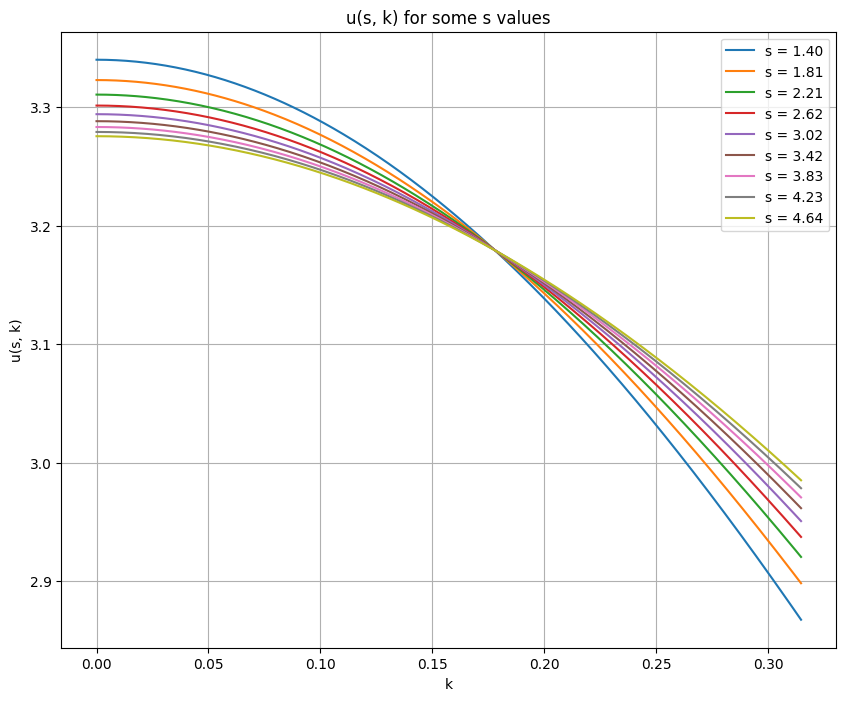

In [10]:
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u(s, k)")
plt.grid()
# plt.ylim(0)
for i in range(0, s_vals.shape[0], s_vals.shape[0]//10):
    if i == 0:
        continue
    plt.plot(k_vals, u[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

$P_s^{i+1}(\alpha, D) = P_s^i(\alpha, D) \int \frac{u(s,k)}{u_{pred}(s,k)}Z(s, k, \alpha, D)dk$

where 

$u_{pred}(s,k) = \int \int P_s^{i}(\alpha, D) Z(s, k, \alpha, D) d\alpha dD$


In [11]:
u_pred = np.zeros(u.shape)
print(f"shape of u_pred : {u_pred.shape}")

shape of u_pred : (100, 500)


In [12]:
# initialize P_alpha_d
# P_alpha_d = np.ones((u.shape[0], num_alphas, num_ds))

# P_alpha_d = np.zeros((u.shape[0], num_alphas, num_ds))


# P_alpha_d[:, 2, 20] = 1

# initialize P_alpha_d to be a gaussian distribution with peak at (alpha, d) = (0.5, 2.5)
alpha0 = 0.2
d0 = 1.5
P_alpha_d = np.zeros((u.shape[0], num_alphas, num_ds))
for i in range(num_alphas):
    for j in range(num_ds):
        P_alpha_d[:, i, j] = np.exp(-((alpha_vals[i] - alpha0)**2 + (d_vals[j] - d0)**2) / 0.1)

# print(P_alpha_d)
# # normalize P_alpha_d
P_alpha_d /= np.trapz(np.trapz(P_alpha_d, x=d_vals, axis=2), x=alpha_vals, axis=1)[:, None, None]
# P_alpha_d /= np.trapz(P_alpha_d, x=alpha_vals, axis=1)[:, None, :]

# P_alpha_d = np.ones((num_alphas, num_ds))
print(f"shape of P_alpha_d : {P_alpha_d.shape}")

P_alpha_d_old = P_alpha_d.copy()

shape of P_alpha_d : (100, 10, 50)


In [13]:
def contour_plt(P_alpha_d, i=0):
    """
    Visualise P_alpha_d as a countour plot using contourf
    """
    # plot
    # rescale the y axis to be in the range of 0 to 2
    # rescale the x axis to be in the range of 0 to 1000
    plt.figure(figsize=(4, 4))
    x = np.linspace(dlowlim, dhighlim, num_ds)
    y = np.linspace(alphlowlim, alphhighlim, num_alphas)
    plt.contourf(x, y, P_alpha_d[i], 20, cmap='RdGy')
    plt.xlabel('d')
    plt.ylabel('alpha')
    plt.colorbar()
    plt.show()

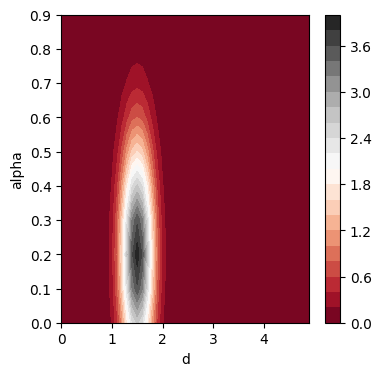

In [14]:
# visualize P_alpha_d inital
# for i in range(0, len(P_alpha_d), 5):
#     contour_plt(P_alpha_d, i)
contour_plt(P_alpha_d, (s_vals.shape[0]-1)//2)

In [15]:
def integ1(u_pred, P_alpha_d, alpha_vals, d_vals, k_vals, s_vals):
    # implement $u_{pred}(s,k) = \int \int P_s^{i}(\alpha, D) Z(\alpha, D, s, k) d\alpha dD$
    
    ############# correct but slow code with Z ind diff #############
    # for i in range(u_pred.shape[0]):
    #     for j in range(u_pred.shape[1]):
    #         u_pred[i, j] = np.trapz(np.trapz(P_alpha_d[i] * Z[:, :, i, j], d_vals, axis=1), alpha_vals, axis=0)
    ############# correct but slow code #############
    
    ############# vectorized code #############
    u_pred = np.trapz(np.trapz(P_alpha_d[:, None, :, :] * Z, d_vals, axis=3), alpha_vals, axis=2)
    ############# vectorized code #############

    # normalize u_pred for each s
    u_pred = u_pred / np.trapz(u_pred, k_vals, axis=1).reshape(-1, 1)

    return u_pred

def integ2(u, u_pred, P_alpha_d, alpha_vals, d_vals, k_vals, s_vals):
    # implement $P_s^{i+1}(\alpha, D) = P_s^i(\alpha, D) \int \frac{u(s,k)}{u_{pred}(s,k)}Z(\alpha, D, s, k)dk$

    # calculate ratio = u/u_pred
    u_pred[u_pred < 1e-7] = 0
    ratio = np.divide(u, u_pred, out=np.ones_like(u), where=u_pred != 0)
    print(f"mean ratio : {np.mean(ratio)}")
    # ratio = abs(ratio)

    ############# correct but slow code with Z ind diff #############
    # for i in range( P_alpha_d.shape[0]):
    #     for j in range(P_alpha_d.shape[1]):
    #         for k in range(P_alpha_d.shape[2]):
    #             P_alpha_d[i, j, k] *= np.trapz(ratio[i] * Z[j, k, i, :], k_vals)
    ############# correct but slow code #############
    
    ############# vectorized code #############
    P_alpha_d *= np.trapz(ratio[:, :, None, None] * Z, k_vals, axis=1)
    ############# vectorized code #############
                
    # normalize P_alpha_d for each s
    norm = np.trapz(np.trapz(P_alpha_d, x=d_vals, axis=2), x=alpha_vals, axis=1)[:, None, None]
    P_alpha_d = P_alpha_d / norm

    return P_alpha_d

In [16]:
# iterate until delta is small enough
delta = 10000
num_iter = 0
# while delta > 1e-3 and num_iter < 1:
while delta > 1e-10:
    u_pred = integ1(u_pred, P_alpha_d, alpha_vals, d_vals, k_vals, s_vals)
    P_alpha_d = integ2(u, u_pred, P_alpha_d, alpha_vals, d_vals, k_vals, s_vals)
    delta = np.sum((P_alpha_d - P_alpha_d_old)**2)
    print(f"delta : {delta}")
    P_alpha_d_old = P_alpha_d.copy()
    num_iter += 1
    # if num_iter % 5 == 0:
    #     contour_plt(P_alpha_d, (s_vals.shape[0]-1)//2)
print(f"num_iter : {num_iter}")

mean ratio : 0.9999132634179032
delta : 6.924801278470768e-06
mean ratio : 0.9999132657531105
delta : 6.9243567376064004e-06
mean ratio : 0.9999132680882862
delta : 6.923912226176266e-06
mean ratio : 0.9999132704234299
delta : 6.923467744205281e-06
mean ratio : 0.9999132727585416
delta : 6.923023291674134e-06
mean ratio : 0.9999132750936214
delta : 6.922578868584508e-06
mean ratio : 0.9999132774286695
delta : 6.92213447493098e-06
mean ratio : 0.9999132797636857
delta : 6.921690110726497e-06
mean ratio : 0.9999132820986699
delta : 6.921245775951063e-06
mean ratio : 0.9999132844336224


KeyboardInterrupt: 

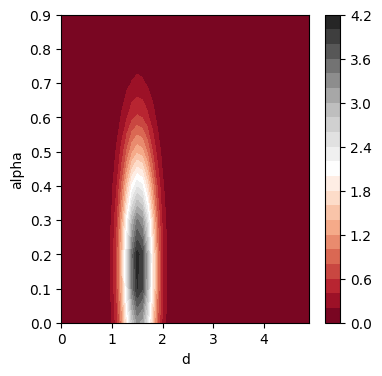

ratio = 0.9999970637802097


In [19]:
contour_plt(P_alpha_d, (s_vals.shape[0]-1)//2)
print(f"ratio = {np.mean(u/u_pred)}")

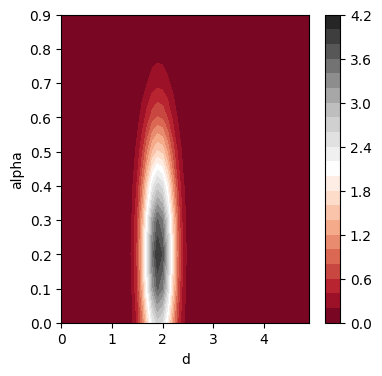

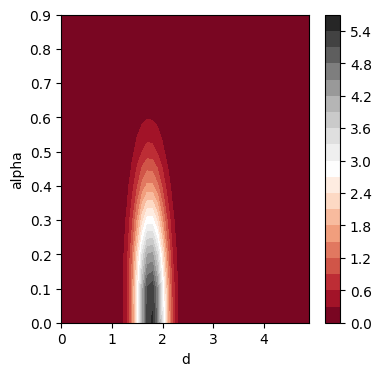

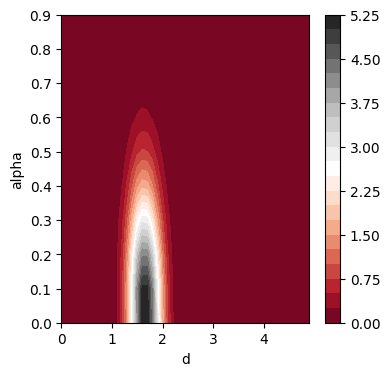

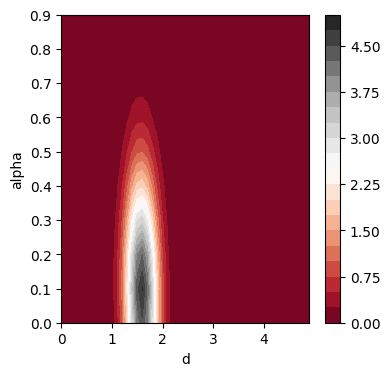

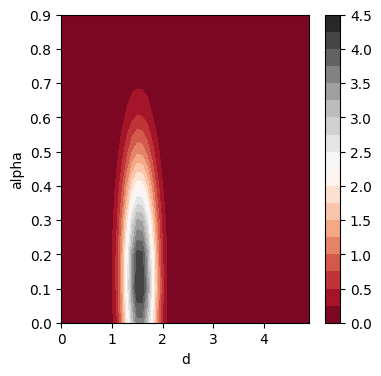

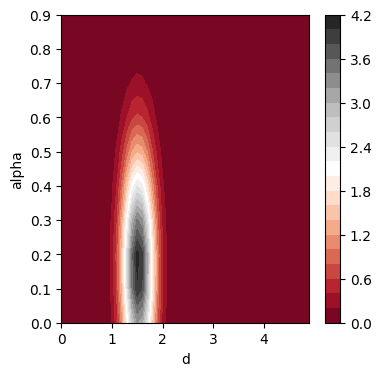

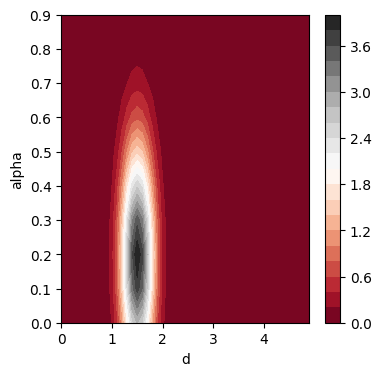

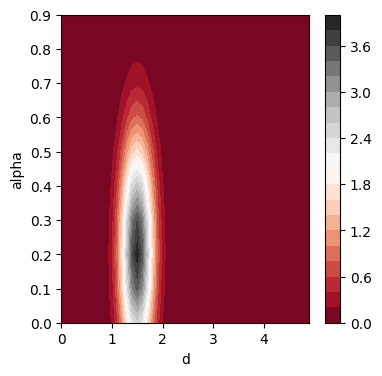

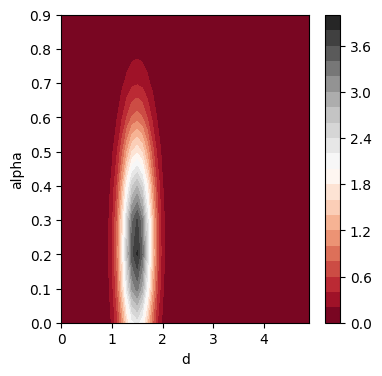

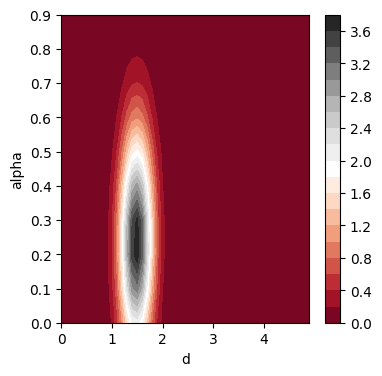

In [18]:
for i in range(0, len(P_alpha_d), s_vals.shape[0]//10):
    contour_plt(P_alpha_d, i)